In [1]:
pip install gdown

In [2]:
import os
import torch
from torch.utils.data import DataLoader
from utils import *
import urllib
import gdown

C:\Users\mhasson\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
C:\Users\mhasson\Anaconda3\envs\pytorch\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback

In [3]:
# Set the paths to your image folder and where you want the CSV file of results to be exported 
sample = 'MT101_3_15_24'
data_path = f"D:/Michael/Quartz_classifier/example_inference_for_Brian/images/{sample}"
# model_path = r"D:\Michael\Quartz_classifier\example_inference_for_Brian\final_checkpt\qtz_final_model.pth"
csv_path = f"D:/Michael/Quartz_classifier/example_inference_for_Brian/example_predictions/{sample}.csv"

# confidence_threshold = 0.25

In [6]:
url = 'https://drive.google.com/uc?export=download&id=1y6Ana6E-J4jjpc5r2K9fsyu7quA8bXZs'

model_path = 'qtz_final_model.pth'
gdown.download(url, model_path, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1y6Ana6E-J4jjpc5r2K9fsyu7quA8bXZs
From (redirected): https://drive.google.com/uc?export=download&id=1y6Ana6E-J4jjpc5r2K9fsyu7quA8bXZs&confirm=t&uuid=18a3990d-ff2f-4d02-9d54-890f4151dd12
To: D:\Michael\Quartz_classifier\Final paper materials\final_py_files\qtz_final_model.pth
100%|████████████████████████████████████████████████████████████████████████████████| 283M/283M [00:02<00:00, 115MB/s]


'qtz_final_model.pth'

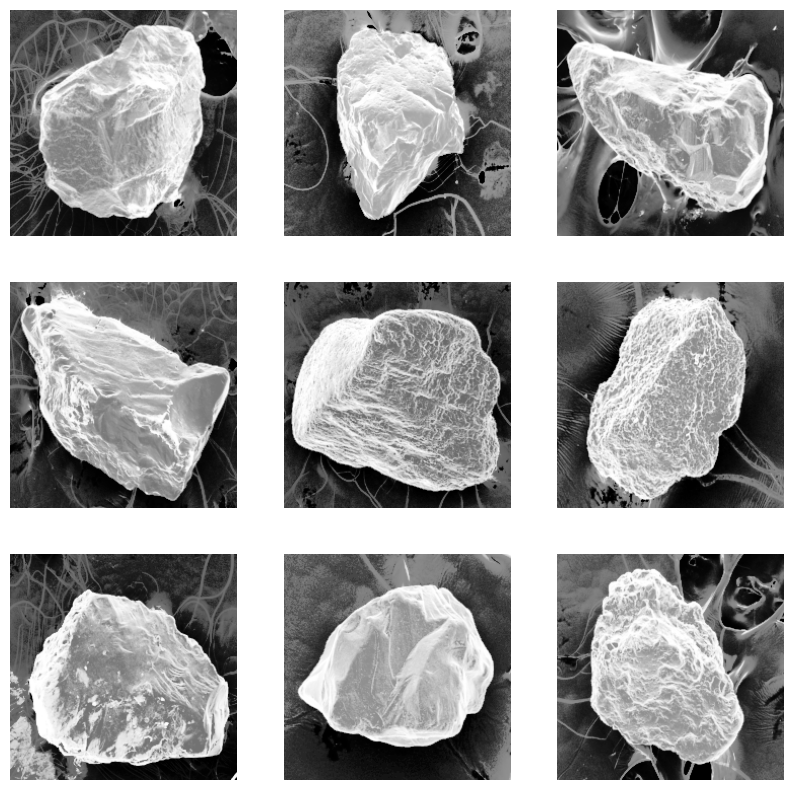

Predicting on sample MT101_3_15_24
Saved CSV at: D:/Michael/Quartz_classifier/example_inference_for_Brian/example_predictions/MT101_3_15_24.csv


In [7]:
# Gather image paths
paths = []
for subdir, dirs, files in os.walk(data_path):
    for file in files:
        filepath = subdir + os.sep + file
        paths.append(filepath)

# Create the dataset and dataloader
imagedataset = CustomDataset(paths, transform=transform)
imagedl = DataLoader(imagedataset, batch_size=1, drop_last=False)

# Display random images
display_random_images(imagedataset)

# Make predictions! The default confidence threshold is 0.75. If you want to change the threshold, simply add it as an input argument after csv_path. 
# It should look like: confidence_threshold=0.5. If you don't specify, the default will be used automatically. 
make_predictions(sample, imagedataset, imagedl, model_path, csv_path)
